In [1]:
! pip install ddgs fastcore fastdownload fastai

In [2]:
from ddgs import DDGS

results = DDGS().text("python programming", max_results=5)
print(results)

[{'title': 'Python (programming language)', 'href': 'https://en.wikipedia.org/wiki/Python_(programming_language)', 'body': 'Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language. Python 3.0, released in 2008, was a major revision and not completely backward-compatible with earlier versions. Recent versions, such as Python 3.13, 3.12 and older (and 3.14), have added capabilities and keywords for typing (and more; e.g. increasing speed); helping with (optional) static typing. Currently only versions in the 3.x series are supported.Python consistently ranks as one of the most popular programming lan

In [3]:
def search_images(query,max_results=200):
    images = DDGS().images(query=query,max_results=max_results)
    return [image["image"]  for image in images]

In [4]:
urls = search_images('goku',1)
urls[0]

'https://images.hdqwalls.com/download/dragon-ball-son-goku-4k-bl-1440x2560.jpg'

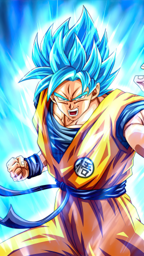

In [5]:
from fastdownload import download_url
dest= 'goku.jpg'

download_url(urls[0],dest,show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)

im.to_thumb(256,256)

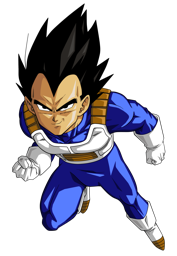

In [6]:
download_url(search_images('vegeta',max_results=1)[0],'vegeta.jpg',show_progress=True)

img2=Image.open('vegeta.jpg')

img2.to_thumb(256,256)

In [7]:
searches = 'goku','vegeta'

path = Path('goku_or_vegeta')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o,max_size=400,dest=path/o)

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)